<a href="https://colab.research.google.com/github/FirmanAhmadBayumi/Machine-Learning/blob/main/PERTEMUAN6_FirmanAhmadBayumi_2117051062.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertemuan 6

## Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
# matplotlib untuk visualisasi
import matplotlib.pyplot as plt
# standarscaler untuk preprosing restandar data
from sklearn.preprocessing import StandardScaler
# modeling hirarki clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering as AG
# metrics untuk evaluasi
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# warna pada titik di grafik scatter
from matplotlib.colors import ListedColormap

## Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass


In [ ]:
# informasi dataframe (jumlah data, jumlah kolom, jumlah baris, tipe data, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   npm                      372 non-null    int64  
 1   activeness_score         372 non-null    int64  
 2   assignment_score         364 non-null    float64
 3   pre_test_score           336 non-null    float64
 4   post_test_score          363 non-null    float64
 5   midterm_test_score       361 non-null    float64
 6   end_semester_test_score  372 non-null    int64  
 7   pass_test                372 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 23.4+ KB


In [ ]:
# informasi statistik dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
npm,372.0,2.022041e+09,107.531391,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09
activeness_score,372.0,9.275806e+01,44.578778,-9.600000e+01,8.500000e+01,9.000000e+01,9.500000e+01,6.660000e+02
assignment_score,364.0,8.532967e+01,8.626380,7.000000e+01,7.900000e+01,8.500000e+01,9.200000e+01,1.000000e+02
pre_test_score,336.0,5.798810e+01,26.472625,1.000000e+01,3.500000e+01,6.150000e+01,8.100000e+01,1.000000e+02
post_test_score,363.0,5.279890e+01,25.691020,1.000000e+01,3.200000e+01,5.100000e+01,7.400000e+01,1.000000e+02
midterm_test_score,361.0,5.339889e+01,24.968789,1.000000e+01,3.200000e+01,5.300000e+01,7.300000e+01,1.000000e+02
end_semester_test_score,372.0,5.333065e+01,30.695107,-9.700000e+01,3.100000e+01,5.250000e+01,7.900000e+01,1.000000e+02


In [ ]:
# jumlah NaN / missing values setiap column
df.isna().sum()

npm                         0
activeness_score            0
assignment_score            8
pre_test_score             36
post_test_score             9
midterm_test_score         11
end_semester_test_score     0
pass_test                   0
dtype: int64

## Preprocessing

In [ ]:
# hapus data outlier
df.loc[df["activeness_score"]<0, "activeness_score"] = np.nan
df.loc[df["activeness_score"]>100, "activeness_score"] = np.nan

In [ ]:
# # assign missing values dengan mean untuk setiap column yang ada missing nya
df["activeness_score"].fillna(value=df["activeness_score"].mean(), inplace=True)
df["assignment_score"].fillna(value=df["assignment_score"].mean(), inplace=True)
df["pre_test_score"].fillna(value=df["pre_test_score"].mean(), inplace=True)
df["post_test_score"].fillna(value=df["post_test_score"].mean(), inplace=True)
df["midterm_test_score"].fillna(value=df["midterm_test_score"].mean(), inplace=True)

In [ ]:
# hapus kolom yang tidak diperlukan
df_clean = df.drop(['npm', 'pass_test'], axis=1)

In [ ]:
# recale data-nya
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_clean)

## Modelling
Modeling/Training data menggunakan algoritma hierarchical clustering

In [ ]:
# lihat pemetaan clustering berdasarkan hirarki dengan metode divisive
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

In [ ]:
# berhubung clustering ini menggunakan pendekatan herarki,
# maka digunakan visualisasi untuk lebih mudah memahaminya
def plot_dendrogram(clusters):
  plt.figure(figsize=(20, 6))
  dendrogram(clusters, orientation="top", leaf_font_size=9, leaf_rotation=360)
  plt.ylabel('Euclidean Distance');

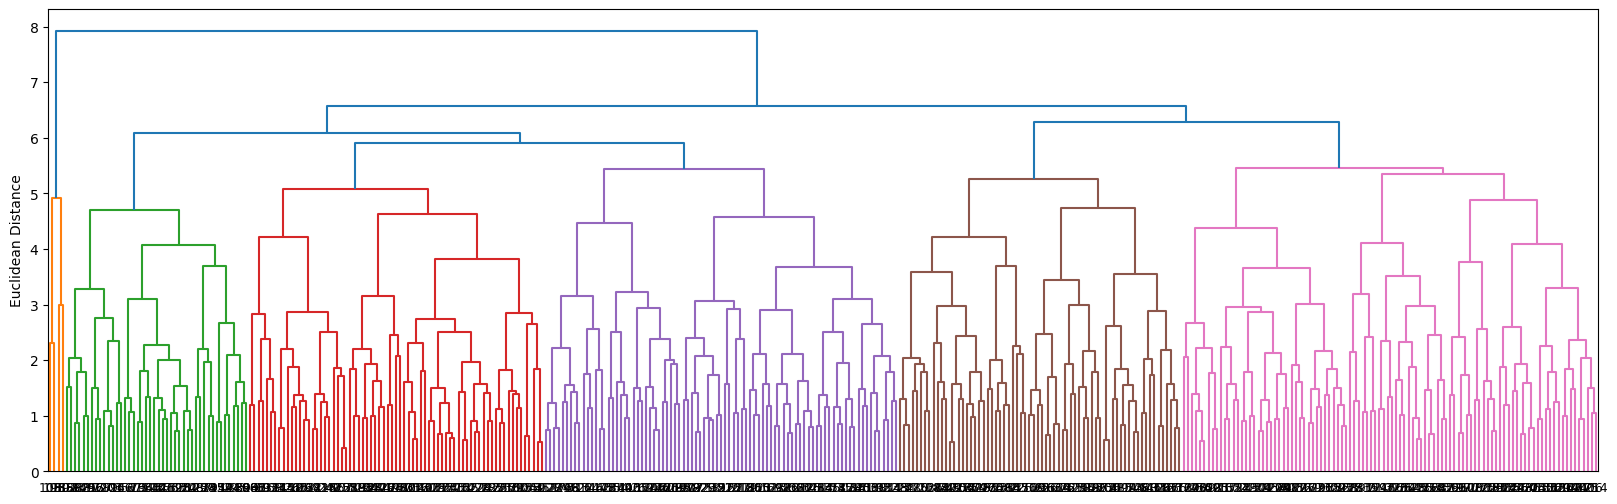

In [ ]:
plot_dendrogram(complete_clustering)

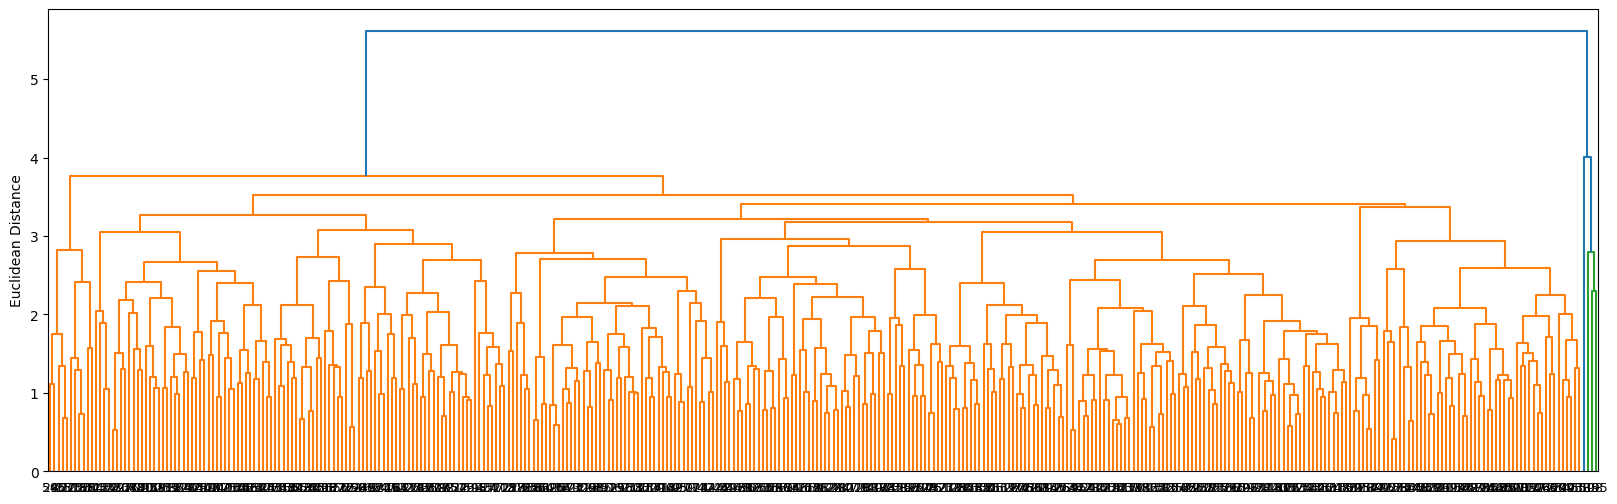

In [ ]:
plot_dendrogram(average_clustering)

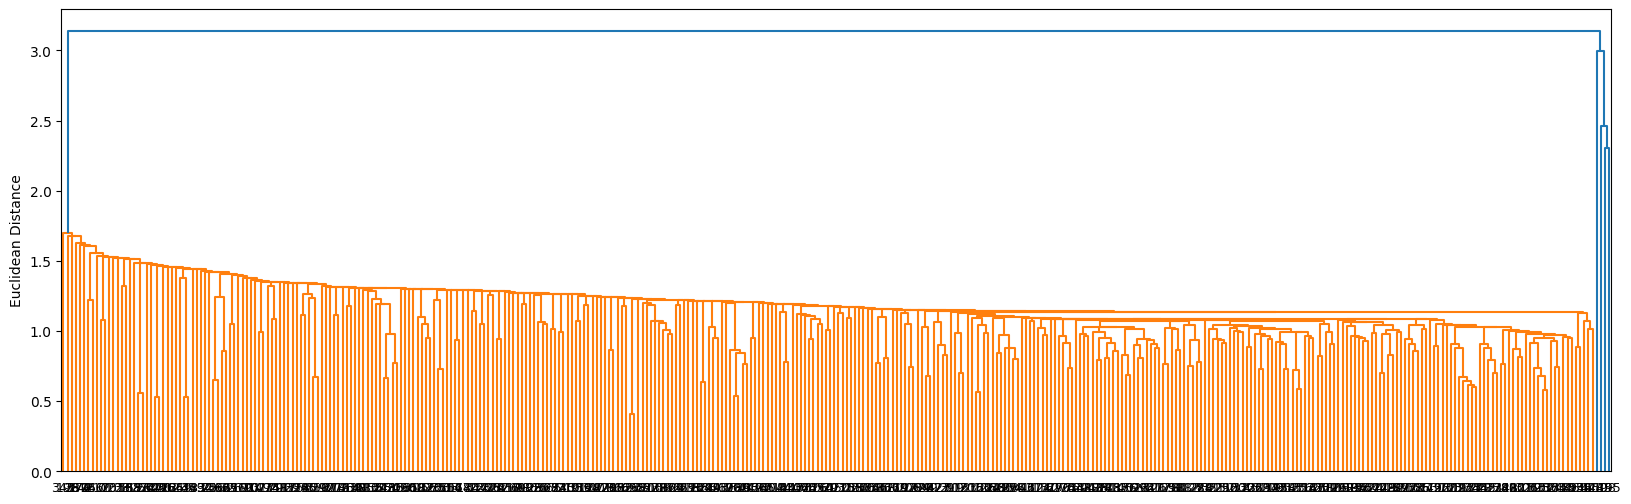

In [ ]:
plot_dendrogram(single_clustering)

In [ ]:
# predict data cluster bisa menggunakan agglomerative,
# karena sama-sama pendekatan clustering hirarki
# asal parameternya sama dengan divisive sebelumnnya
model = AG(n_clusters=2, metric="euclidean").fit(df_clean)
# hasil clustering
label = model.labels_

## Evaluation

In [ ]:
Z = df_clean.copy()

In [ ]:
# Silhoutte Score dapat digunakan untuk mengevaluasi pemisahan suatu cluster
# selain itu matriks ini dapat mengevaluasi apakah cluster overlapping atau tidak
# semakin nilai tersebut mendekati 0, semakin bagus pemisahan cluster
ss = silhouette_score(Z, label)
print(f"silhouette score yang didapat adalah: {ss}")

silhouette score yang didapat adalah: 0.1472906100582593


In [ ]:
# Calinski Harabasz Score dapat digunakan untuk mengevaluasi suatu cluster,
# apakah sudah cukup terpisah dengan baik atau tidak
# semakin besar nilai yang diperoleh, semakin banyak cluster yang dipisahkan
sc = calinski_harabasz_score(Z, label)
print(f"Calinski Harabasz score yang didapat adalah: {sc}")

Calinski Harabasz score yang didapat adalah: 64.32213986808439


In [ ]:
# Matrik ini dapat digunakan untuk mengevaluasi suatu model cluster,
# apakah sudah menghasilkan cluster yang bagus atau tidak
# semakin kecil nilai yang diperoleh (mendekati 0), semakin bagus model cluster tersebut
sd = davies_bouldin_score(Z, label)
print(f"Davies Bouldin score yang didapat adalah: {sd}")

Davies Bouldin score yang didapat adalah: 2.269267831996057


## Tugas
Buat Visualisasi Clustering

### Load Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass


### Preprocessing

In [ ]:
# Mengganti nilai 'not pass' dengan 0 dan nilai 'pass' dengan 1
df['actual_cluster'] = df['pass_test'] = df['pass_test'].replace('not pass', 0)
df['actual_cluster'] = df['pass_test'] = df['pass_test'].replace('pass', 1)

df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,actual_cluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,0,0
1,2022041102,96,77.0,NaN,27.0,100.0,89,1,1
2,2022041103,86,71.0,84.0,17.0,21.0,41,0,0
3,2022041104,81,96.0,NaN,NaN,11.0,99,0,0
4,2022041105,93,85.0,68.0,29.0,44.0,50,0,0


In [ ]:
# Menghapus data outlier
df.loc[df["activeness_score"]<0, "activeness_score"] = np.nan
df.loc[df["activeness_score"]>100, "activeness_score"] = np.nan

# assign missing values dengan mean untuk setiap column yang ada missing nya
df["activeness_score"].fillna(value=df["activeness_score"].mean(), inplace=True)
df["assignment_score"].fillna(value=df["assignment_score"].mean(), inplace=True)
df["pre_test_score"].fillna(value=df["pre_test_score"].mean(), inplace=True)
df["post_test_score"].fillna(value=df["post_test_score"].mean(), inplace=True)
df["midterm_test_score"].fillna(value=df["midterm_test_score"].mean(), inplace=True)

In [ ]:
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,actual_cluster
0,2022041101,99.0,71.0,93.000000,52.000000,44.0,24,0,0
1,2022041102,96.0,77.0,57.988095,27.000000,100.0,89,1,1
2,2022041103,86.0,71.0,84.000000,17.000000,21.0,41,0,0
3,2022041104,81.0,96.0,57.988095,52.798898,11.0,99,0,0
4,2022041105,93.0,85.0,68.000000,29.000000,44.0,50,0,0


### Modelling

In [ ]:
# Buat predicted_cluster dari hasil pemodelan Agglomerative Clustering
data = df[["activeness_score", "assignment_score", "pre_test_score", "post_test_score", "midterm_test_score", "end_semester_test_score"]]
predicted_cluster = AG(n_clusters=2).fit(data)

df['predicted_cluster'] = predicted_cluster.labels_
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,actual_cluster,predicted_cluster
0,2022041101,99.0,71.0,93.000000,52.000000,44.0,24,0,0,1
1,2022041102,96.0,77.0,57.988095,27.000000,100.0,89,1,1,1
2,2022041103,86.0,71.0,84.000000,17.000000,21.0,41,0,0,0
3,2022041104,81.0,96.0,57.988095,52.798898,11.0,99,0,0,0
4,2022041105,93.0,85.0,68.000000,29.000000,44.0,50,0,0,1


### Actual Cluster

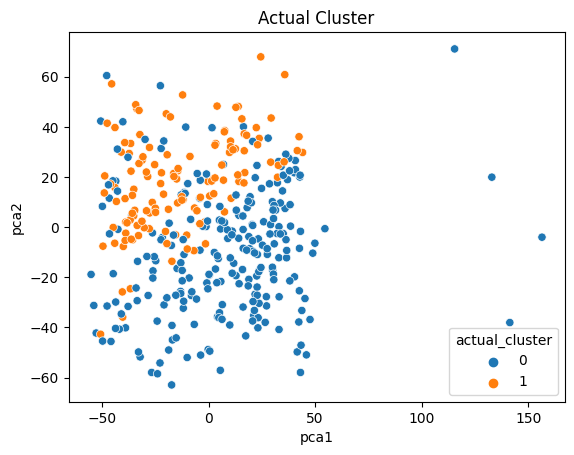

In [ ]:
# scatter plot untuk actual_cluster
df['actual_cluster'] = label
df['actual_cluster'] = df['pass_test']

reduced_data = PCA(n_components = 2).fit_transform(df_clean)
df_reduced_data = pd.DataFrame(reduced_data, columns = ['pca1', 'pca2'])
sns.scatterplot(x = 'pca1', y = 'pca2', hue = df['actual_cluster'], data = df_reduced_data)
plt.title('Actual Cluster')
plt.show()

### Predicted Cluster

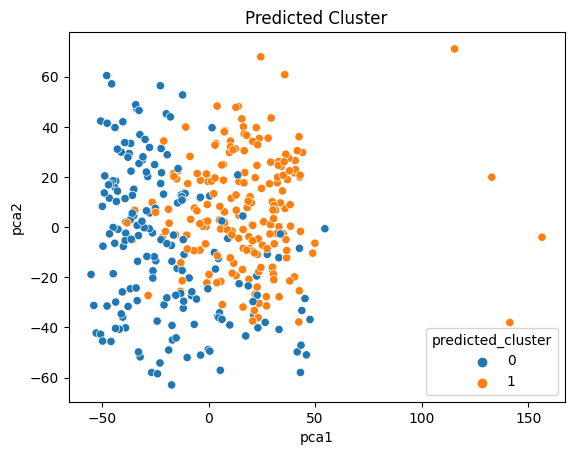

In [ ]:
# scatter plot untuk predicted_cluster
df['predicted_cluster'] = label

reduced_data = PCA(n_components = 2).fit_transform(df_clean)
df_reduced_data = pd.DataFrame(reduced_data, columns = ['pca1', 'pca2'])
sns.scatterplot(x = 'pca1', y = 'pca2', hue = df['predicted_cluster'], data = df_reduced_data)
plt.title('Predicted Cluster')
plt.show()